In [2]:
!pip install pandas

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)


You should consider upgrading via the 'C:\Users\ajinf\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
import pandas as pd

In [25]:
data = pd.read_csv("bitcoin_full_dataset_1h_21_24.csv")

In [26]:
data

,Unnamed: 0,Date,price,buys_per_hour,sells_per_hour,volume_bought_per_hour,volume_sold_per_hour,size_bought_per_hour,size_sold_per_hour
0,0,2020-12-31 16:00:00,28627.20,2.0,0.0,2.177925e+03,0.000000e+00,0.075600,0.000000
1,1,2021-01-01 01:00:00,29390.18,3.0,1.0,3.022732e+02,1.041392e+03,0.010300,0.035500
2,2,2021-01-01 02:00:00,29348.01,2.0,0.0,2.145550e+03,0.000000e+00,0.073200,0.000000
3,3,2021-01-01 03:00:00,29260.00,0.0,1.0,0.000000e+00,3.189340e+02,0.000000,0.010900
4,4,2021-01-01 05:00:00,29171.31,1.0,0.0,1.079338e+02,0.000000e+00,0.003700,0.000000
...,...,...,...,...,...,...,...,...,...
25976,25976,2024-02-27 11:00:00,56526.99,5345.0,5506.0,9.643225e+06,9.774185e+06,170.746857,173.073562
25977,25977,2024-02-27 12:00:00,56783.28,13569.0,11444.0,5.531386e+07,4.985537e+07,970.466203,874.547027
25978,25978,2024-02-27 13:00:00,57112.73,6341.0,6312.0,4.344131e+07,4.482176e+07,763.123694,787.409127
25979,25979,2024-02-27 14:00:00,56975.45,6525.0,6526.0,4.784900e+07,4.694685e+07,840.079634,824.159767


In [28]:
temp = data['price']

In [29]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(temp.values.reshape(-1, 1))

<Axes: >

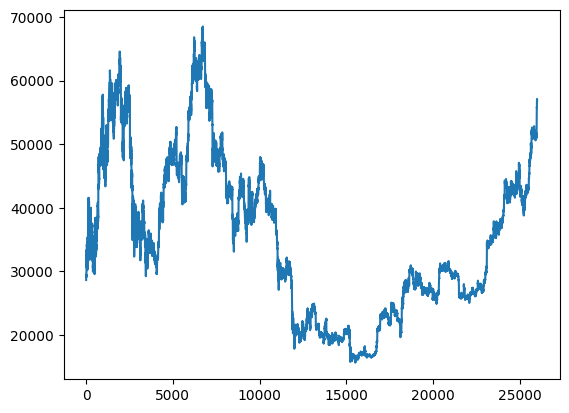

In [30]:
import matplotlib.pyplot as plt 

temp.plot()

In [33]:
prices_scaled

array([[0.24541778],
       [0.25985243],
       [0.25905462],
       ...,
       [0.78432916],
       [0.78173199],
       [0.77740451]])

In [35]:
import numpy as np
def df_to_X_y(df, window_size=5):
  df_as_np = df
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [36]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(prices_scaled, WINDOW_SIZE)
X1.shape, y1.shape

((25976, 5, 1, 1), (25976, 1))

In [37]:
X_train1, y_train1 = X1[:20000], y1[:20000]
X_val1, y_val1 = X1[20000:25000], y1[20000:25000]
X_test1, y_test1 = X1[25000:], y1[25000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((20000, 5, 1, 1),
 (20000, 1),
 (5000, 5, 1, 1),
 (5000, 1),
 (976, 5, 1, 1),
 (976, 1))

In [38]:
y_train1

array([[0.25402223],
       [0.25346374],
       [0.25914165],
       ...,
       [0.21116098],
       [0.20497378],
       [0.20698447]])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
# Adding an LSTM Layer
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [41]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0174 - root_mean_squared_error: 0.1135 - val_loss: 2.4990e-05 - val_root_mean_squared_error: 0.0050
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3397e-05 - root_mean_squared_error: 0.0097 - val_loss: 2.2227e-05 - val_root_mean_squared_error: 0.0047
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5808e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.8917e-05 - val_root_mean_squared_error: 0.0043
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0513e-05 - root_mean_squared_error: 0.0095 - val_loss: 2.1854e-05 - val_root_mean_squared_error: 0.0047
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2528e-05 - root_mean_squared_error: 0.0096 - val_loss: 2.9964e-05 - val_root_mean_squared_error: 0.0055
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9577e-05 - root_mean_squared_error: 0.0095 - val_loss: 3.9353e-05 - val_root_mean_squared_error: 0.0063
Epoch 7/

In [42]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')

In [48]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


,Train Predictions,Actuals
0,0.255374,0.254022
1,0.255355,0.253464
2,0.254103,0.259142
3,0.254944,0.257955
4,0.255513,0.261820
...,...,...
19995,0.212502,0.211399
19996,0.211675,0.210771
19997,0.211013,0.211161
19998,0.210648,0.204974


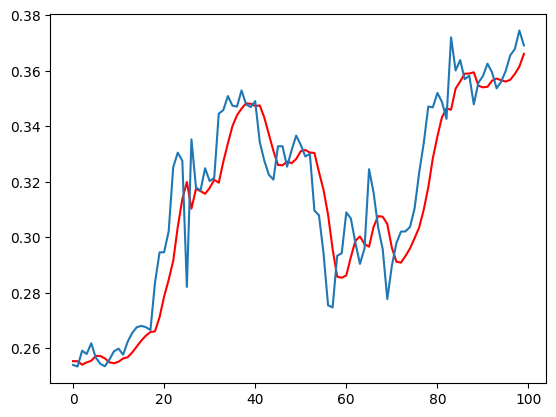

In [51]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100], color='red')
plt.plot(train_results['Actuals'][:100])